# Importing and Splitting data adjusted for class imbalance (Country)

### Preparing Train and Test set before any processing to avoid data leakage

In this section, we're importing all the necessary libraries that we'll use throughout this notebook. We're also setting up the environment to display plots inline in the notebook.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# split the data into train and test
from sklearn.model_selection import train_test_split

Here, we're reading in our dataset from an Excel file. This dataset contains all the information we'll be analyzing and modeling.


In [2]:
os.getcwd()

'c:\\Users\\fenan\\OneDrive\\Desktop\\NETHERLANDS\\msc-data-science\\Final Thesis\\repo-MSc-Final-Project\\src\\data-preparation'

In [3]:
df = pd.read_excel("../../data/survey_results_public3.0.xlsx")

Now, we're displaying the information about our dataframe including the number of entries, columns, and the data type of each column. This will help us understand more about the data that we're dealing with.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73268 entries, 0 to 73267
Data columns (total 81 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ResponseId                      73268 non-null  int64  
 1   MainBranch                      73268 non-null  object 
 2   Employment                      71709 non-null  object 
 3   RemoteWork                      58958 non-null  object 
 4   CodingActivities                58899 non-null  object 
 5   EdLevel                         71571 non-null  object 
 6   LearnCode                       71580 non-null  object 
 7   LearnCodeOnline                 50685 non-null  object 
 8   LearnCodeCoursesCert            29389 non-null  object 
 9   YearsCode                       71331 non-null  object 
 10  YearsCodePro                    51833 non-null  object 
 11  DevType                         61302 non-null  object 
 12  OrgSize                         

In this part of the code, we're selecting the specific columns that we want to use for our analysis and renaming them to be more readable and understandable. 

We also display the first few rows of our dataframe to verify that everything looks as expected.


In [5]:
df = df[["Employment", "RemoteWork", "CodingActivities", "EdLevel", "LearnCodeCoursesCert", "DevType", "OrgSize",
"Country", "Age", "Gender", "Trans", "Sexuality", "Ethnicity", "Accessibility","MentalHealth", "WorkExp", "YearsCodePro", "ConvertedCompYearly"]]
df = df.rename(columns={
    "Employment": "Job_type", # full-time, part-time ...
    "RemoteWork": "Remote_work", # hybrid, onsite, remote
    "CodingActivities": "Coding_as_hobby", # yes , no
    "EdLevel": "Education", # bachelors, masters, high school ...
    "LearnCodeCoursesCert": "Certifications", # yes / no
    "DevType": "Job_title", # data scientist, ML engineer, data analyst ...
    "OrgSize": "Company_size", # 'XS', 'S', 'M', 'L', 'XL'
    "Age": "Age", # 18 - 24 years old, 25 - 34 years old ...
    "Gender": "Gender", # male, female, prefer not to say ...
    "Trans": "Trans", # yes / no ---> the yes will be included in gender column, the column then will be deleted for simplicity
    "Sexuality": "Sexual_orientation", # gay or lesbian, straight, prefer not to say, ...
    "Ethnicity": "Ethnicity", # White / European, Indian / South Asian, African, ...
    "Accessibility": "Physical_disability", # no / yes, prefer not to say
    "MentalHealth": "Mental_disability", # No, Various_disabilities, Memory_disorder, Others, Anxiety_disorder ...
    "WorkExp": "Work_experience", # 3, 7, 16, 20, ...
    "YearsCodePro": "Coding_experience", # 'Less than 1 year', '10', '7', '6', '8', '1',
    "ConvertedCompYearly": "Annual_salary"} # 15000, 39600, 266080, 48740 ... in USD $ 
    )
df.sample(10)

,Job_type,Remote_work,Coding_as_hobby,Education,Certifications,Job_title,Company_size,Country,Age,Gender,Trans,Sexual_orientation,Ethnicity,Physical_disability,Mental_disability,Work_experience,Coding_experience,Annual_salary
31602,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Masterâ€™s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,"Developer, full-stack","Just me - I am a freelancer, sole proprietor, ...",Australia,35-44 years old,Man,No,Straight / Heterosexual,South Asian,None of the above,None of the above,NaN,19,84925.0
52906,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects;Schoo...,"Masterâ€™s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,"Developer, mobile","10,000 or more employees",Hungary,25-34 years old,Man,No,Straight / Heterosexual,White;European,NaN,None of the above,NaN,5,NaN
68779,"Employed, full-time",Fully remote,I donâ€™t code outside of work,"Masterâ€™s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,"Engineer, data;Engineer, site reliability;Deve...",100 to 499 employees,"Iran, Islamic Republic of...",25-34 years old,Prefer not to say,Prefer not to say,Prefer not to say,Prefer not to say,None of the above,None of the above,10.0,10,14184.0
65289,"Independent contractor, freelancer, or self-em...","Hybrid (some remote, some in-person)",I donâ€™t code outside of work,"Secondary school (e.g. American high school, G...",Coursera;Udemy;Codecademy;edX,Data scientist or machine learning specialist;...,"Just me - I am a freelancer, sole proprietor, ...",Germany,55-64 years old,Woman,No,NaN,White;European,None of the above,I have a concentration and/or memory disorder ...,NaN,22,186650.0
71612,"Student, full-time",NaN,NaN,"Secondary school (e.g. American high school, G...",Udacity,NaN,NaN,Netherlands,18-24 years old,Man,No,Straight / Heterosexual,European,None of the above,"I have learning differences (e.g., Dyslexic, D...",NaN,NaN,NaN
34220,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;School or academic work,"Other doctoral degree (Ph.D., Ed.D., etc.)",NaN,Academic researcher,10 to 19 employees,China,35-44 years old,Man,No,Straight / Heterosexual,Asian;East Asian,None of the above,Prefer not to say,10.0,10,82588.0
18808,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelorâ€™s degree (B.A., B.S., B.Eng., etc.)",NaN,"Developer, back-end;Cloud infrastructure engineer","10,000 or more employees",United States of America,25-34 years old,Man,No,Gay or Lesbian,White,None of the above,None of the above,NaN,3,NaN
69343,"Employed, full-time",Fully remote,Hobby,"Professional degree (JD, MD, etc.)",Coursera;Udemy;Codecademy,"Developer, front-end;Developer, full-stack;Dev...",2 to 9 employees,Russian Federation,25-34 years old,Man,No,Straight / Heterosexual,European,NaN,NaN,NaN,2,16620.0
13501,"Employed, full-time",Fully remote,Hobby,"Bachelorâ€™s degree (B.A., B.S., B.Eng., etc.)",NaN,"Developer, full-stack",20 to 99 employees,United States of America,25-34 years old,Man,No,Straight / Heterosexual,White,None of the above,None of the above,13.0,4,110000.0
10291,"Employed, full-time",Fully remote,Hobby,"Bachelorâ€™s degree (B.A., B.S., B.Eng., etc.)",NaN,"Developer, back-end","10,000 or more employees",United States of America,25-34 years old,Man,No,Straight / Heterosexual,White,None of the above,None of the above,NaN,6,200000.0


In [6]:
df.shape[0] # 73268 rows to work with

73268

#### `Country` class imbalance

In [7]:
# Count appearances of each country
country_counts = df['Country'].value_counts(ascending=True)
print(country_counts.head(5))

# Get countries with 5 or more appearances
valid_countries = country_counts[country_counts >= 5].index

# Filter the DataFrame to only include these countries
df = df[df['Country'].isin(valid_countries)]

Country
Saint Kitts and Nevis    1
San Marino               1
Burkina Faso             1
Brunei Darussalam        1
Solomon Islands          1
Name: count, dtype: int64


In [8]:
country_counts.filter(like='Kosovo')

Country
Kosovo    29
Name: count, dtype: int64

In this section, we're removing any rows from our dataframe where the 'Annual_salary' column is null. We then display the new number of rows in our dataframe to see how many rows were dropped.


In [9]:
df = df[df["Annual_salary"].notnull()]
df.shape[0]

38061

In [10]:
df.Annual_salary.isnull().sum() # no null values anymore!

0

In this section, we're defining a function to create stratified folds in our data, and then using this function to create a new 'fold' column in our dataframe. 

We then split our data into a train set and a test set based on these folds. This way, both splits will have "a bit of everything".




In [11]:
from sklearn.model_selection import StratifiedKFold
import numpy as np
import pandas as pd

def create_country_salary_folds(df, n_s=5, n_grp=60, seed=42):
    # Create a grouped column for salary
    df['salary_group'] = pd.qcut(df['Annual_salary'], n_grp, labels=False, duplicates='drop')

    # Combine country and salary group into one column to use for stratification
    df['stratify_group'] = df['Country'].astype(str) + df['salary_group'].astype(str)

    skf = StratifiedKFold(n_splits=n_s, shuffle=True, random_state=seed)

    fold_nums = np.zeros(len(df))
    for fold_no, (_, v) in enumerate(skf.split(df, df['stratify_group'])):
        fold_nums[v] = fold_no

    # Drop the helper columns
    df.drop(['salary_group', 'stratify_group'], axis=1, inplace=True)

    return fold_nums

In [12]:
# New threshold, for countries with less than this number, we'll ensure there's at least 1 in the test set
threshold = 20

# Find countries with fewer samples than the threshold
small_sample_countries = df['Country'].value_counts().loc[lambda x: x <= threshold].index.tolist()

# Split rows from these countries manually
small_sample_rows = df[df['Country'].isin(small_sample_countries)]

manual_train_rows = []
manual_test_rows = []

# Loop through each of these countries and split manually
for country in small_sample_countries:
    country_rows = small_sample_rows[small_sample_rows['Country'] == country]
    
    # Always reserve 1 sample for test, rest for training
    test_sample = country_rows.sample(n=1, random_state=42)
    train_sample = country_rows.drop(test_sample.index)
    
    manual_train_rows.append(train_sample)
    manual_test_rows.append(test_sample)

# Combine all the manually split samples
train_small_sample = pd.concat(manual_train_rows, axis=0)
test_small_sample = pd.concat(manual_test_rows, axis=0)

# Remove these rows from the original DataFrame
df = df.drop(small_sample_rows.index)

# ---- NUEVO código de muestreo manual termina aquí ----

# Use the modified function to create stratified folds
df['fold'] = create_country_salary_folds(df)

# Let's say we want to use the first fold as our test set and the rest as our training set
test_fold = 0

train = df[df['fold'] != test_fold].copy()
test = df[df['fold'] == test_fold].copy()

# Add the manually sampled rows to the train and test sets
train = pd.concat([train, train_small_sample], axis=0)
test = pd.concat([test, test_small_sample], axis=0)

# Drop the 'fold' column before further processing
train.drop(columns='fold', inplace=True)
test.drop(columns='fold', inplace=True)

c:\Users\fenan\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


We used `StratifiedKFold` to create stratified folds of the `Annual_salary` column, which is our target variable. 

This is a good approach as it ensures that each fold has the same distribution of the target variable, which can result in a more robust model.

In [13]:
# Now let's check the shape of the train and test data
train.shape, test.shape

((30486, 18), (7575, 18))

In [14]:
train.head()

,Job_type,Remote_work,Coding_as_hobby,Education,Certifications,Job_title,Company_size,Country,Age,Gender,Trans,Sexual_orientation,Ethnicity,Physical_disability,Mental_disability,Work_experience,Coding_experience,Annual_salary
2,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Masterâ€™s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,Data scientist or machine learning specialist;...,20 to 99 employees,United Kingdom of Great Britain and Northern I...,25-34 years old,Man,No,Bisexual,White,None of the above,"I have a mood or emotional disorder (e.g., dep...",NaN,5,40205.0
8,"Employed, full-time","Hybrid (some remote, some in-person)",I donâ€™t code outside of work,"Masterâ€™s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,"Developer, back-end",I donâ€™t know,Netherlands,25-34 years old,Woman,No,Prefer to self-describe:,European,"Or, in your own words:","Or, in your own words:",6.0,6,49056.0
10,"Employed, full-time","Hybrid (some remote, some in-person)",I donâ€™t code outside of work,"Bachelorâ€™s degree (B.A., B.S., B.Eng., etc.)",NaN,"Developer, full-stack;Developer, back-end",100 to 499 employees,United Kingdom of Great Britain and Northern I...,18-24 years old,Man,No,Straight / Heterosexual,European,None of the above,None of the above,NaN,2,60307.0
12,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelorâ€™s degree (B.A., B.S., B.Eng., etc.)",NaN,"Developer, full-stack",2 to 9 employees,United States of America,25-34 years old,Man,No,Straight / Heterosexual,White,None of the above,None of the above,5.0,5,65000.0
14,"Employed, full-time;Independent contractor, fr...",Fully remote,Hobby;Freelance/contract work,"Masterâ€™s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,"Developer, full-stack;Academic researcher;DevO...","5,000 to 9,999 employees",United States of America,25-34 years old,Man,No,Straight / Heterosexual,White,None of the above,None of the above,5.0,5,110000.0


In [15]:
test.head()

,Job_type,Remote_work,Coding_as_hobby,Education,Certifications,Job_title,Company_size,Country,Age,Gender,Trans,Sexual_orientation,Ethnicity,Physical_disability,Mental_disability,Work_experience,Coding_experience,Annual_salary
3,"Employed, full-time",Fully remote,I donâ€™t code outside of work,"Bachelorâ€™s degree (B.A., B.S., B.Eng., etc.)",NaN,"Developer, full-stack",100 to 499 employees,Israel,35-44 years old,Man,No,Straight / Heterosexual,White,None of the above,None of the above,NaN,17,215232.0
11,"Employed, full-time;Independent contractor, fr...",Fully remote,Hobby;Contribute to open-source projects;Freel...,"Bachelorâ€™s degree (B.A., B.S., B.Eng., etc.)",NaN,Engineering manager,20 to 99 employees,United States of America,35-44 years old,Man,No,Straight / Heterosexual,White,None of the above,"I have a mood or emotional disorder (e.g., dep...",14.0,10,194400.0
16,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelorâ€™s degree (B.A., B.S., B.Eng., etc.)",Udemy;Codecademy,"Developer, full-stack",2 to 9 employees,Czech Republic,25-34 years old,Man,No,Bisexual,European,None of the above,"I have a mood or emotional disorder (e.g., dep...",NaN,4,19224.0
53,"Employed, full-time",Fully remote,Hobby,"Bachelorâ€™s degree (B.A., B.S., B.Eng., etc.)",NaN,"Developer, front-end;Developer, full-stack;Dev...",100 to 499 employees,United States of America,25-34 years old,Man,No,Straight / Heterosexual,White;Middle Eastern,NaN,NaN,12.0,10,170000.0
56,"Employed, full-time","Hybrid (some remote, some in-person)",I donâ€™t code outside of work,"Bachelorâ€™s degree (B.A., B.S., B.Eng., etc.)",NaN,"Developer, back-end;Developer, embedded applic...",100 to 499 employees,Taiwan,25-34 years old,Man,No,NaN,Asian;East Asian;Southeast Asian,None of the above,None of the above,3.0,3,55163.0


### Did stratification actually work?

In this part of the code, we're splitting our data into a train set and a test set using a random train-test split. We will use these datasets to compare the effect of stratification on our data.


In [16]:
# Let's split the data into train and test
train_before_stratification, test_before_stratification = train_test_split(df, test_size=0.2, shuffle=True, random_state=42)

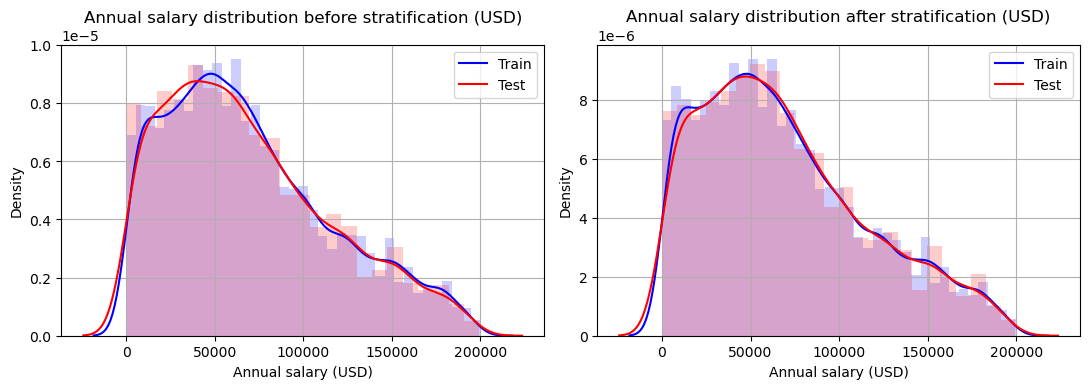

In [17]:
# Plot 1
train_before = train_before_stratification[(train_before_stratification.Annual_salary < 200000) & (train_before_stratification.Annual_salary > train_before_stratification.Annual_salary.min())].Annual_salary
test_before = test_before_stratification[(test_before_stratification.Annual_salary < 200000) & (test_before_stratification.Annual_salary > test_before_stratification.Annual_salary.min())].Annual_salary

# Create subplots and assign axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 4))

sns.kdeplot(train_before, ax=ax1, color='blue', fill=False)
sns.kdeplot(test_before, ax=ax1, color='red', fill=False)
train_before.hist(ax=ax1, bins='scott', alpha=0.2, density=True, color='blue')
test_before.hist(ax=ax1, bins='scott', alpha=0.2, density=True, color='red')
ax1.set_xlabel('Annual salary (USD)')
ax1.set_ylabel('Density')
ax1.set_title('Annual salary distribution before stratification (USD)', y=1.05)
ax1.legend(['Train', 'Test'])  

# Plot 2
train_sal = train[(train.Annual_salary < 200000) & (train.Annual_salary > train.Annual_salary.min())].Annual_salary
test_sal = test[(test.Annual_salary < 200000) & (test.Annual_salary > test.Annual_salary.min())].Annual_salary

sns.kdeplot(train_sal, ax=ax2, color='blue', fill=False)
sns.kdeplot(test_sal, ax=ax2, color='red', fill=False)
train_sal.hist(ax=ax2, bins='scott', alpha=0.2, density=True, color='blue')
test_sal.hist(ax=ax2, bins='scott', alpha=0.2, density=True, color='red')
ax2.set_xlabel('Annual salary (USD)')
ax2.set_ylabel('Density')
ax2.set_title('Annual salary distribution after stratification (USD)')
ax2.legend(['Train', 'Test'])

plt.tight_layout()
plt.savefig("../paper/data-preparation/import-split/stratification-results.pdf")
plt.show()

Finally, we're saving our stratified train and test dataframes to csv files so we can use them in the next steps.


#### Satefy measure!

Before saving our stratified train and test sets, let's review if there's still a country that's in train but not in test (or viceversa) it that case, we will just drop the row


In [18]:
# Extract unique countries from the train and test sets
train_countries = set(train['Country'].unique())
test_countries = set(test['Country'].unique())

# Find countries that are in the train set but not in the test set
missing_in_test = train_countries - test_countries
print("Countries in the train set that aren't in the test set:", missing_in_test)

missing_in_train = test_countries - train_countries
print("Countries in the test set that aren't in the train set:", missing_in_train)

# Drop records with countries that are in 'missing_in_test' from the training set
train = train[~train['Country'].isin(missing_in_test)]

# Drop records with countries that are in 'missing_in_train' from the test set
test = test[~test['Country'].isin(missing_in_train)]

Countries in the train set that aren't in the test set: set()
Countries in the test set that aren't in the train set: {'Somalia'}


In [19]:
# we will save the train and test data into csv files
train.to_csv("../output/train.csv", index=False)
test.to_csv("../output/test.csv", index=False)

# since it will be also the input for the train/test nbs
train.to_csv("../input/train.csv", index=False)
test.to_csv("../input/test.csv", index=False)

## Summary

Splitting before EDA, data cleaning and feature engineering has some advantages:

- **Prevents Data Leakage:** By splitting the data first, you prevent any potential data leakage between the training and test sets, preserving the integrity of the evaluation process.
- **Real-World Scenario Simulation:** In real-world scenarios, the model will be deployed on unseen data. Training the model this way simulates that environment more closely.